# 1. Pandas_Python Data Science

In [1]:
import numpy as np
import pandas as pd
pd.__version__

'0.25.1'

In [2]:
#pd? to display the built-in Pandas documentation

In [3]:
#fundamental Pandas data structures: the Series, DataFrame, and Index.

# 1.1 The Pandas Series Object

In [4]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [5]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [8]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                index=['a', 'b', 'c', 'd'])            #string index
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [9]:
data['b'] #by index

0.5

In [10]:
population_dict = {'California': 38332521,
                    'Texas': 26448193,
                    'New York': 19651127,
                    'Florida': 19552860,
                    'Illinois': 12882135}
population = pd.Series(population_dict) #series from dictionary
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [11]:
population['California':'Illinois'] #slice by string index

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [12]:
pd.Series(5, index=[100, 200, 300])  #construnct series

100    5
200    5
300    5
dtype: int64

In [13]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2]) #construnct series

3    c
2    a
dtype: object

# 1.2 The Pandas DataFrame Object

In [14]:
area_dict = {'California': 423967, 
             'Texas': 695662, 
             'New York': 141297,
             'Florida': 170312, 
             'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [15]:
states = pd.DataFrame({'population': population,          #construct dataframe containing two series
                        'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [16]:
states.index #dataframe indeces
states.columns #dataframe columns

Index(['population', 'area'], dtype='object')

In [17]:
states['area'] #subseting by column as dictionary

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

# 1.3 Constructing DataFrame objects

In [18]:
pd.DataFrame(population, columns=['population']) #by serie

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [19]:
data = [{'a': i, 'b': 2 * i} #by dictionary
for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [20]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}]) #mising values

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [21]:
pd.DataFrame({'population': population, #from dictionary with series
                'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [22]:
pd.DataFrame(np.random.rand(3, 2), #with numpy array
            columns=['foo', 'bar'],
            index=['a', 'b', 'c'])

,foo,bar
a,0.459557,0.338035
b,0.575683,0.140198
c,0.557279,0.785032


In [23]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')]) #two dimensional numpy array
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


# 1.4 The Pandas Index Object

In [24]:
ind = pd.Index([2, 3, 5, 7, 11])
ind 

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [25]:
ind[1]
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [26]:
print(ind.size, ind.shape, ind.ndim, ind.dtype) #Index objects also have many of the attributes

5 (5,) 1 int64


In [27]:
#index are immutable that is, they cannot be modified via the normal means

In [28]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [29]:
print(indA & indB) # intersection vectorized operations with inices
print(indA | indB) # union
print(indA ^ indB) # symmetric difference

Int64Index([3, 5, 7], dtype='int64')
Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')
Int64Index([1, 2, 9, 11], dtype='int64')


In [30]:
indA.intersection(indB) #via object methods like ufuncs

Int64Index([3, 5, 7], dtype='int64')

# 1.5 Data Selection in Series

In [31]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data['b']                  #as dictionary

0.5

In [32]:
'a' in data

True

In [33]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [34]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [35]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [36]:
data['a':'c'] # slicing by explicit index final index is included in the slice

a    0.25
b    0.50
c    0.75
dtype: float64

In [37]:
data[0:2] # slicing by implicit integer index

a    0.25
b    0.50
dtype: float64

In [38]:
data[(data > 0.3) & (data < 0.8)] # masking

b    0.50
c    0.75
dtype: float64

In [39]:
data[['a', 'e']] # fancy indexing

a    0.25
e    1.25
dtype: float64

# 1.6 Indexers: loc, iloc, and ix

In [40]:
#Because of this potential confusion in the case of integer indeces, Pandas provides
#some special indexer attributes that explicitly expose certain indexing schemes

In [41]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [42]:
data.loc[1]  #always references only the explicit index

'a'

In [43]:
data.loc[1:3] #always references only the explicit index

1    a
3    b
dtype: object

In [44]:
data.iloc[1] #always references implicit Python-style index

'b'

In [45]:
data.iloc[1:3] #always references implicit Python-style index

3    b
5    c
dtype: object

# 1.7 Data Selection in DataFrame ,indexing

In [46]:
import pandas as pd
area = pd.Series({'California': 423967, 'Texas': 695662,
'New York': 141297, 'Florida': 170312,
'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
'New York': 19651127, 'Florida': 19552860,
'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [47]:
data['area'] #same
data.area   #same

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [48]:
data.area is data['area'] #same object

True

In [49]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [50]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [51]:
data.T #transpose the full DataFrame to swap rows and columns

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [52]:
data.iloc[:3, :2] #indexing

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [53]:
data.loc[:'Illinois', :'pop'] #indexing

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [54]:
data.ix[:3, :'pop'] #hybrid for integer index, the ix indexer is subject to the same potential sources of confusion

C:\Users\Titan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Titan\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [55]:
data.loc[data.density > 100, ['pop', 'density']] #masking + list indexing

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [56]:
data.iloc[0, 2] = 90 #modifying values

#for example
data["gender"] #можно обращаться к стобцам через квадратные скобки, можно получить серию
data[["gender"]]#можно обращаться к стобцам через двойные квадратные скобки, можно получить датафрейм
data[1:3] #строки с 1 по 3, но нельзя отдельные строки
data.gender # атрибут название стобца получение серии
data[[False,True,True,False,True]] #можно вставлять логическую последовательность, получать строки
data[["gender"]][1:3]#и комбинацию этих выражений

In [57]:
data['Florida':'Illinois'] #slicing refers to rows

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [58]:
data[1:3] #slicing by row numbers

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [59]:
data[data.density > 100] #masking operations

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


# 1.8 Operating on Data in Pandas. Pandas Ufuncs

In [60]:
#NumPy ufunc will work on Pandas Series and DataFrame objects

In [61]:
import pandas as pd
import numpy as np

In [62]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4)) #series generation 

In [63]:
ser

0    6
1    3
2    7
3    4
dtype: int32

In [64]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                    columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [65]:
np.exp(ser) #exponent (е^ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [66]:
np.sin(df * np.pi / 4) #Any of the ufuncs can be used in a similar manner.

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


In [67]:
np.arange(5) / np.arange(1, 6) #vectorized

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [68]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

In [69]:
x = np.arange(4)
print("x =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2) # floor division
print("-x = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2 = ", x % 2)

x = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2 =  [0 1 0 1]


In [70]:
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

In [71]:
print(np.add(x, 2))           #+ arithmetic ufuncs
print(np.subtract(x, 2))      #-
print(np.multiply(x, 2))      #*
print(np.divide(x, 2))        #/
print(np.floor_divide(x, 2))  #%
print(np.power(x, 2))         #**
print(np.mod(x, 2))           #%%
print(np.negative(x))         #+/-

[2 3 4 5]
[-2 -1  0  1]
[0 2 4 6]
[0.  0.5 1.  1.5]
[0 0 1 1]
[0 1 4 9]
[0 1 0 1]
[ 0 -1 -2 -3]


In [72]:
x = np.array([-2, -1, 0, 1, 2]) #abs
print(abs(x))
print(np.abs(x))
print(np.absolute(x))

[2 1 0 1 2]
[2 1 0 1 2]
[2 1 0 1 2]


In [73]:
theta = np.linspace(0, np.pi, 3) #cos, sin, tan, arc
print("theta = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))
x = [-1, 0, 1]
print("x = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

theta =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]
x =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


In [74]:
x = [1, 2, 3] #exponent
print("x =", x)
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))
print("3^x =", np.power(3, x))

x = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3  9 27]


In [75]:
x = [1, 2, 4, 10] #logorithm
print("x =", x)
print("ln(x) =", np.log(x))
print("log2(x) =", np.log2(x))
print("log10(x) =", np.log10(x))

x = [1, 2, 4, 10]
ln(x) = [0.         0.69314718 1.38629436 2.30258509]
log2(x) = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


In [76]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


In [77]:
#Index alignment in Series
area = pd.Series({'Alaska': 1723337, 
                  'Texas': 695662,
                    'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 
                        'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [78]:
population / area #the union of index of the two input arrays Nan - Not a Number

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [79]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [80]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [81]:
A.add(B, fill_value=0) #without Nan via argument fill_value

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [82]:
#Index alignment in DataFrame
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                    columns=list('AB'))
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                    columns=list('BAC'))

In [83]:
A + B #sum datas

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [84]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


In [85]:
#+ add()
#- sub(), subtract()
#* mul(), multiply()
#/ truediv(), div(), divide()
#// floordiv()
#% mod()
#** pow()

In [86]:
A = rng.randint(10, size=(3, 4))
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]  #broadcasting serie to a dataframe

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [87]:
df.subtract(df['R'], axis=0) #broadcasting serie to a dataframe

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [88]:
halfrow = df.iloc[0, ::2] #slicing iloc
halfrow

Q    3
S    2
Name: 0, dtype: int32

In [89]:
df

,Q,R,S,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


In [90]:
df - halfrow #substract int from dataframe

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


# 1.9 Missing Data in Pandas

In [91]:
import numpy as np
import pandas as pd
vals1 = np.array([1, None, 3, 4]) #None can be used only in object-type objects
vals1

array([1, None, 3, 4], dtype=object)

In [92]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)                   
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
54.3 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.48 ms ± 23.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



In [93]:
vals1.sum() #ERROR,  cant use with none

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [94]:
vals2 = np.array([1, np.nan, 3, 4])       #Nan as missing value
vals2.dtype                            

dtype('float64')

In [95]:
1 + np.nan, 0 * np.nan, vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan, nan, nan)

In [96]:
vals2

array([ 1., nan,  3.,  4.])

In [97]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2) #aggregation with nan

(8.0, 1.0, 4.0)

In [98]:
pd.Series([1, np.nan, 2, None]) #change none to NaN

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [99]:
#floating No change np.nan
#object No change None or np.nan
#integer Cast to float64 np.nan
#boolean Cast to object None or np.nan

In [100]:
isnull() #operations with null values
notnull()
dropna()
fillna()

NameError: name 'isnull' is not defined

In [101]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()                               #detecting na

0    False
1     True
2    False
3     True
dtype: bool

In [102]:
data[data.notnull()] #mask not NA

0        1
2    hello
dtype: object

In [103]:
data.dropna() #drop na

0        1
2    hello
dtype: object

In [104]:
df = pd.DataFrame([[1, np.nan, 2],
                    [2, 3, 5],
                    [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [105]:
df.dropna() #drop all rows in which any null value is present

,0,1,2
1,2.0,3.0,5


In [106]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [107]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [108]:
df.dropna(axis='columns', how='all') #drop na if all na in column

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [109]:
df.dropna(axis='rows', thresh=3) #if 3 or more values exists dont drop

,0,1,2,3
1,2.0,3.0,5,NaN


In [110]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [111]:
data.fillna(0) #fill na with zeros

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [112]:
# forward-fill
data.fillna(method='ffill') #fill na with previous value

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [113]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [114]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


# 1.10 Multiple Indexing

In [115]:
import pandas as pd
import numpy as np

In [116]:
index = [('California', 2000), ('California', 2010), #bad way
('New York', 2000), ('New York', 2010),
('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
18976457, 19378102,
20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [117]:
index = [('California', 2000), ('California', 2010), #two indeces in serie
            ('New York', 2000), ('New York', 2010),
            ('Texas', 2000), ('Texas', 2010)]
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [118]:
pop = pop.reindex(index) #right way
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [119]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [120]:
pop_df = pop.unstack() #dataframe with serie
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [121]:
pop_df.stack() #make serie with dataframe

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [122]:
pop_df = pd.DataFrame({'total': pop,
                        'under18': [9267089, 9284094,
                                    4687374, 4318033,
                                    5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [123]:
f_u18 = pop_df['under18'] / pop_df['total'] #broadcasting operation
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


In [124]:
df = pd.DataFrame(np.random.rand(4, 2),
                    index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                    columns=['data1', 'data2'])
df

data1     data2
a 1  0.507626  0.776794
  2  0.418350  0.537075
b 1  0.518696  0.035254
  2  0.563523  0.653672

In [125]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)                       #serie with dict

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [126]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)]) #indeces from_tuples
pd.MultiIndex.from_product([['a', 'b'], [1, 2]]) #indeces from_product
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]]) #indeces from_arrays

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [127]:
pop.index.names = ['state', 'year'] #names indeces
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [128]:
pop[:, 2000] #for serie

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [129]:
# hierarchical index and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      29.0  36.2  33.0  36.8  36.0  36.9
     2      31.0  36.0  35.0  36.9  28.0  38.3
2014 1      32.0  36.2  28.0  38.0  33.0  37.1
     2      28.0  37.9  33.0  36.9  43.0  37.8

In [130]:
health_data['Guido', 'HR'] #for dataframe

year  visit
2013  1        33.0
      2        35.0
2014  1        28.0
      2        33.0
Name: (Guido, HR), dtype: float64

In [131]:
health_data.iloc[:2, :2]              #iloc
health_data.loc[:, ('Bob', 'HR')]     #loc

year  visit
2013  1        29.0
      2        31.0
2014  1        32.0
      2        28.0
Name: (Bob, HR), dtype: float64

In [132]:
idx = pd.IndexSlice                       #slice object
health_data.loc[idx[:, 1], idx[:, 'HR']] 

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,29.0,33.0,36.0
2014,1,32.0,28.0,33.0


In [133]:
health_data = health_data.sort_index() #sorting index
health_data                              

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      29.0  36.2  33.0  36.8  36.0  36.9
     2      31.0  36.0  35.0  36.9  28.0  38.3
2014 1      32.0  36.2  28.0  38.0  33.0  37.1
     2      28.0  37.9  33.0  36.9  43.0  37.8

In [134]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [135]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [136]:
pop_flat = pop.reset_index(name='population') #set index to column
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [137]:
pop_flat.set_index(['state', 'year']) #set column to index

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [138]:
data_mean = health_data.mean(level='year') #aggregation
data_mean

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     30.0  36.10  34.0  36.85  32.0  37.60
2014     30.0  37.05  30.5  37.45  38.0  37.45

In [139]:
data_mean.mean(axis=1, level='type') #column aggregations 

type,HR,Temp
year,,
2013,32.000000,36.850000
2014,32.833333,37.316667


# 1.11 Combining Datasets: Concat and Append (join merge)

In [140]:
import pandas as pd
import numpy as np

In [141]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""                
    data = {c: [str(c) + str(i) for i in ind]
        for c in cols}
    return pd.DataFrame(data, ind)
# example DataFrame
make_df('ABC', range(3))            #example dataframe

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [142]:
# Signature in Pandas v0.18
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
            keys=None, levels=None, names=None, verify_integrity=False,
            copy=True)

NameError: name 'objs' is not defined

In [143]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2], axis=1, join='inner')          #inner join

,0,1


In [144]:
pd.concat([ser1, ser2], axis=1, join='outer') #outer concat

,0,1
1,A,NaN
2,B,NaN
3,C,NaN
4,NaN,D
5,NaN,E
6,NaN,F


In [145]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(pd.concat([df3, df4], axis=1)) #merge/join by column

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


In [146]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index                           #make duplicate index!
print(pd.concat([x, y]))                    #duplicate index!

    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [147]:
try:
    pd.concat([x, y], verify_integrity=True)         #catching duplicates
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [148]:
print(pd.concat([x, y], ignore_index=True)) #ignore index

    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [149]:
print(pd.concat([x, y], keys=['x', 'y'])) #keys vith index

      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


In [150]:
print(df3); print(df4); print(df3.append(df4)) #append dfs

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
     A    B    C    D
0   A0   B0  NaN  NaN
1   A1   B1  NaN  NaN
0  NaN  NaN   C0   D0
1  NaN  NaN   C1   D1


C:\Users\Titan\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [6]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

In [7]:
df3 = pd.merge(df1, df2) #one-to-one merge
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [14]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})

In [15]:
pd.merge(df3, df4)  #many-to-one merge guido doubled

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [16]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                    'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                        'spreadsheets', 'organization']})

In [18]:
pd.merge(df1, df5)         #many-to-many merge

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [19]:
pd.merge(df1, df2, on='employee') #key merge

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [20]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})

In [22]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1) #left_on, right_on

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [26]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')

In [33]:
pd.merge(df1a, df2a, left_index=True, right_index=True) #merge by index

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [34]:
df1a.join(df2a) #join by index

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [36]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                    columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                    columns=['name', 'drink'])

In [37]:
pd.merge(df6, df7, how='outer') #outer join

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [39]:
pd.merge(df6, df7, how='left') #left join
pd.merge(df6, df7, how='right') #right join

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


In [41]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})

In [46]:
pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]) #on name and suffixes

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [48]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

In [51]:
merged = pd.merge(pop, abbrevs, how='outer',
left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [54]:
merged[merged['population'].isnull()].head() #looking for null
merged.loc[merged['state'].isnull(), 'state/region'].unique() which region is lack

array(['PR', 'USA'], dtype=object)

In [55]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [56]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [60]:
final.isnull().any()
final['state'][final['area (sq. mi)'].isnull()].unique() #missed USA
final.dropna(inplace=True) #drop nans

In [61]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [62]:
#Now let’s compute the population density
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)'] 
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [63]:
density.tail() #tail

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

# 1.12 Aggregation and Grouping

In [15]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
#count() Total number of items          #common methods
#first(), last() First and last item
#mean(), median() Mean and median
#min(), max() Minimum and maximum
#std(), var() Standard deviation and variance
#mad() Mean absolute deviation
#prod() Product of all items
#sum() Sum of all item

In [6]:
planets.dropna().describe() #describe

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [ ]:
#3 steps in one move: split, apply, combine

In [12]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [13]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [19]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [20]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [25]:
df.groupby('key').aggregate([min, np.median, max]) 

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [27]:
df.groupby('key').aggregate({'data1': 'min',
                            'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [28]:
def filter_func(x):
    return x['data2'].std() > 4

In [29]:
print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func)) #use any function to a data

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [30]:
df.groupby('key').transform(lambda x: x - x.mean()) #transformation of the data

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [31]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

In [32]:
print(df); print(df.groupby('key').apply(norm_by_data2)) #apply lets you apply any function to the group results

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


In [39]:
L = [0, 1, 0, 1, 2, 0]
print(df); print(df.groupby(L).sum()) #3 arbitrary groups

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7


In [40]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2); print(df2.groupby(mapping).sum())                  #two groups by dictionary

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
consonant     12     19
vowel          3      8


In [46]:
df2.groupby(str.lower).mean() #str.lower takes index

,data1,data2
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


In [47]:
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


In [52]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0) #planets by dacades

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# 1.13 Pivot Tables

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [11]:
age = pd.cut(titanic['age'], [0, 18, 80]) #pd cut
titanic.pivot_table('survived', ['sex', age], 'class') #Multilevel pivot tables

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [23]:
fare = pd.qcut(titanic['fare'], 4) #compute quantiles
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 7.91]           (7.91, 14.454]            \
class                    First     Third         Second     Third   
sex    age                                                          
female (0, 18]             NaN  0.625000       1.000000  0.769231   
       (18, 80]            NaN  0.600000       0.880000  0.333333   
male   (0, 18]             NaN  0.000000       0.000000  0.461538   
       (18, 80]            0.0  0.103774       0.098039  0.157143   

fare            (14.454, 31.0]                     (31.0, 512.329]         \
class                    First    Second     Third           First Second   
sex    age                                                                  
female (0, 18]             NaN  1.000000  0.400000        0.909091   1.00   
       (18, 80]          0.875  0.900000  0.470588        0.984848   1.00   
male   (0, 18]             NaN  0.857143  0.266667        0.800000   0.75   
       (18, 80]          0.500  0.041667  0.095238        0.333333   0.00   

fare                       
class               Third  
sex    age                 
female (0, 18]   0.142857  
       (18, 80]  0.166667  
male   (0, 18]   0.076923  
       (18, 80]  0.600000

In [ ]:
# call signature as of Pandas 0.18
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                        aggfunc='mean', fill_value=None, margins=False,
                        dropna=True, margins_name='All')

In [24]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'}) #aggfunc

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [28]:
titanic.pivot_table('survived', index='sex', columns='class' , margins=True) #add all column and row
#the margins_name keyword, which defaults to "All".

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [31]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [32]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


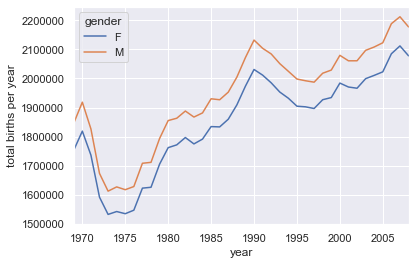

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [37]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

#to filter out rows with births outside these values:

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)') 

In [38]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)            #type changing

In [39]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                                100 * births.month +
                                births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek         #add day of week

In [44]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


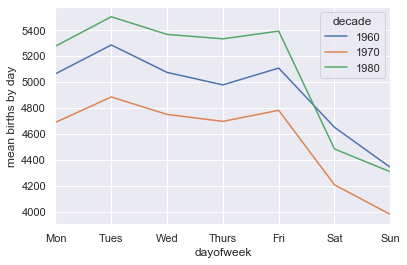

In [41]:
import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births', index='dayofweek',
columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [43]:
births_by_date = births.pivot_table('births',
                            [births.index.month, births.index.day]) #group by month and day
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [45]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


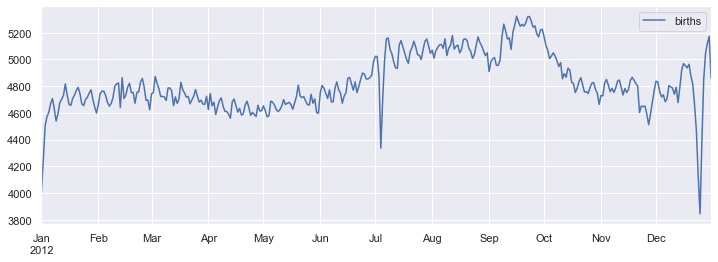

In [46]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

# 1.14 Vectorized str.Operations, regular expressions

In [5]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                    'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [4]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
import pandas as pd
names = pd.Series(data)
names.str.capitalize()         #vectorized operations with strings

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

In [ ]:
#len() lower() translate() islower()                   #all string methods
#ljust() upper() startswith() isupper()           
#rjust() find() endswith() isnumeric()
#center() rfind() isalnum() isdecimal()
#zfill() index() isalpha() split()
#strip() rindex() isdigit() rsplit()
#rstrip() capitalize() isspace() partition()
#lstrip() swapcase() istitle() rpartition()

In [ ]:
#Methods using regular expressions
#match() Call re.match() on each element, returning a Boolean.
#extract() Call re.match() on each element, returning matched groups as strings.
#findall() Call re.findall() on each element.
#replace() Replace occurrences of pattern with some other string.
#contains() Call re.search() on each element, returning a Boolean.
#count() Count occurrences of pattern.
#split() Equivalent to str.split(), but accepts regexps.
#rsplit() Equivalent to str.rsplit(), but accepts regexps.

In [6]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [7]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [ ]:
#get() Index each element
#slice() Slice each element
#slice_replace() Replace slice in each element with passed value
#cat() Concatenate strings
#repeat() Repeat values
#normalize() Return Unicode form of string
#pad() Add whitespace to left, right, or both sides of strings
#wrap() Split long strings into lines with length less than a given width
#join() Join strings in each element of the Series with passed separator
#get_dummies() Extract dummy variables as a DataFrame

In [8]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [9]:
full_monte = pd.DataFrame({'name': monte,
                            'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',
                            'B|C|D']})
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [17]:
try:
    recipes = pd.read_json('recipeitems-latest.json')
except ValueError as e:
    print("ValueError:", e)

ValueError: Trailing data


In [18]:
with open('recipeitems-latest.json') as f:
    line = f.readline()
pd.read_json(line).shape

(2, 12)

In [28]:
import codecs
# read the entire file into a Python array
with codecs.open('recipeitems-latest.json', 'r', "utf_8_sig") as f: #codecs
    # Extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is the element of a list
    data_json = "[{0}]".format(','.join(data))
# read the result as a JSON
recipes = pd.read_json(data_json)
recipes.shape

(173278, 17)

In [33]:
recipes.head(1)

,_id,name,ingredients,url,image,ts,cookTime,source,recipeYield,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
0,{'$oid': '5160756b96cc62079cc2db15'},Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276011104},PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man ha...",NaN,NaN,NaN,NaN,NaN


In [34]:
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617805
std         146.705075
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

In [38]:
recipes.name[np.argmax(recipes.ingredients.str.len())] #argmax

'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

In [41]:
recipes.description.str.contains('[Bb]reakfast').sum() #recipes for breakfast
recipes.ingredients.str.contains('[Cc]innamon').sum() #recipes with ciannamon
recipes.ingredients.str.contains('[Cc]inamon').sum() #misspell cinamon

11

In [ ]:
#recipe recomendation system

In [42]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
                'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [45]:
import re
spice_df = pd.DataFrame(
    dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
                                                    for spice in spice_list))
spice_df.head()

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


10

In [47]:
recipes.name[selection.index]

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object

# 1.15 Working with Time Series

In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2015") #dates parsing
date

datetime.datetime(2015, 7, 4, 0, 0)

In [4]:
date.strftime('%A') #used one of the standard string format codes for printing dates ("%A")
#Python date documentation
#https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior 
#https://docs.python.org/3/library/datetime.html
#dateutil
#http://labix.org/python-dateutil
#time zones
#http://pytz.sourceforge.net/

'Saturday'

In [5]:
#Typed arrays of times: NumPy’s datetime64
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [7]:
date + np.arange(12) #vectorazed

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [9]:
np.datetime64('2015-07-04 12:59:59.50', 'ns') #nanoseconds based

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [ ]:
#Description of date and time codes
#Code Meaning     Time span (relative)     Time span (absolute)
#Y     Year        ± 9.2e18 years             [9.2e18 BC, 9.2e18 AD]
#M     Month         ± 7.6e17 years           [7.6e17 BC, 7.6e17 AD]
#W     Week         ± 1.7e17 years           [1.7e17 BC, 1.7e17 AD]
#D     Day             ± 2.5e16 years       [2.5e16 BC, 2.5e16 AD]
#h     Hour         ± 1.0e15 years           [1.0e15 BC, 1.0e15 AD]
#m     Minute         ± 1.7e13 years          [1.7e13 BC, 1.7e13 AD]
#s     Second         ±  2.9e12 years         [ 2.9e9 BC, 2.9e9 AD]
#ms     Millisecond     ± 2.9e9 years         [ 2.9e6 BC, 2.9e6 AD]
#us     Microsecond     ± 2.9e6 years        [290301 BC, 294241 AD]
#ns     Nanosecond     ± 292 years            [ 1678 AD, 2262 AD]
#ps     Picosecond     ± 106 days            [ 1969 AD, 1970 AD]
#fs     Femtosecond     ± 2.6 hours          [ 1969 AD, 1970 AD]
#as     Attosecond     ± 9.2 seconds         [ 1969 AD, 1970 AD]

In [ ]:
#numpy datetime documentation
#https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html

In [ ]:
#Time in Pandas

In [12]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [13]:
date.strftime('%A')

'Saturday'

In [14]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [15]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                            '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [16]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [17]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [ ]:
#Time types in pandas
#For time stamps, Pandas provides the Timestamp type
#For time periods, Pandas provides the Period type
#For time deltas or durations, Pandas provides the Timedelta type

In [18]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', #parsing different times
'2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [19]:
dates.to_period('D') #convertation to periodindex

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [20]:
dates - dates[0] #TimedeltaIndex

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [23]:
pd.date_range('2015-07-03', '2015-07-10') #range
pd.date_range('2015-07-03', periods=8)  #another syntax of same

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [26]:
print(pd.date_range('2015-07-03', periods=8, freq='H')) #8 periods by hours
print(pd.period_range('2015-07', periods=8, freq='M'))  #8 periods by months
print(pd.timedelta_range(0, periods=10, freq='H'))      #10 periods by hours

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')
PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')
TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')


In [ ]:
#D Calendar day        B Business day
#W Weekly
#M Month end         BM Business month end
#Q Quarter end        BQ Business quarter end
#A Year end          BA Business year end
#H Hours            BH Business hours
#T Minutes
#S Seconds
#L Milliseonds
#U Microseconds
#N Nanoseconds

In [ ]:
#MS Month start
#BMS Business month start
#QS Quarter start

#BQS Business quarter start
#AS Year start
#BAS Business year start

In [27]:
pd.timedelta_range(0, periods=9, freq="2H30T") #2 hours 30 minuts

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [28]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay()) #business days (except weekends and holydays and any others)

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [59]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016',
                        data_source='iex')
goog.head()

RemoteDataError: Unable to read URL: https://cloud.iexapis.com/stable/stock/market/batch?symbols=GOOG&types=chart&range=max&token=pk_9d0ea375f7a14265baa6c2868bae78ae
Response Text:
b'You have exceeded your allotted message quota. Please enable pay-as-you-go to regain access'

In [43]:
import os
os.environ["IEX_API_KEY"] = "pk_9d0ea375f7a14265baa6c2868bae78ae" 
import pandas_datareader.data as web
from datetime import datetime
start = datetime(2016, 9, 1)
end = datetime(2018, 9, 1)
goog = web.DataReader('F', 'iex', start, end)

In [48]:
goog.head()

,open,high,low,close,volume
date,,,,,
2016-09-01,12.66,12.72,12.35,12.44,40510406
2016-09-02,12.53,12.57,12.46,12.50,21079776
2016-09-06,12.49,12.67,12.43,12.67,36098940
2016-09-07,12.62,12.75,12.62,12.70,22879114
2016-09-08,12.50,12.75,12.50,12.73,34017856


In [56]:
goog = goog['close']

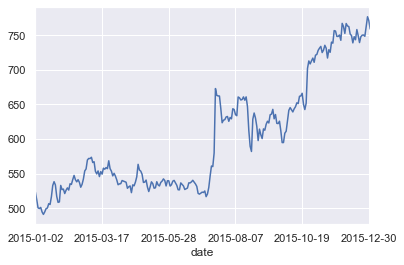

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
goog.plot();

In [60]:
goog.index = pd.DatetimeIndex(goog.index)

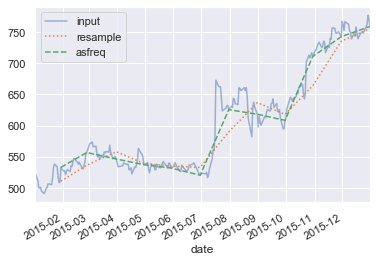

In [62]:
goog.plot(alpha=0.5, style='-')
goog.resample('BM').mean().plot(style=':')              #resample by month (using end of month)
goog.asfreq('BM').plot(style='--');                     #asfreq by month(using start of month)
plt.legend(['input', 'resample', 'asfreq'],
                loc='upper left');

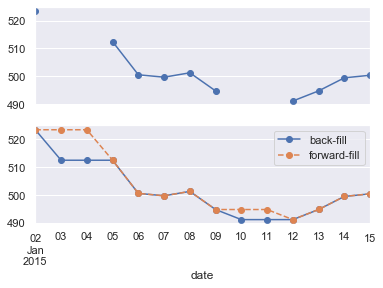

In [63]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

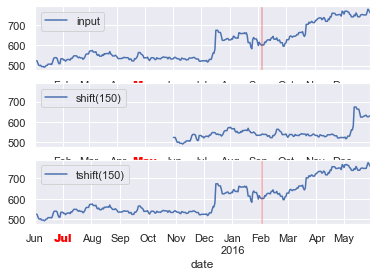

In [77]:
fig, ax = plt.subplots(3, sharey=True)
# apply a frequency to the data
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0])
goog.shift(150).plot(ax=ax[1])           #shift the data by 150 days
goog.tshift(150).plot(ax=ax[2])          #tshift shifts the index values by 150 days.

# legends and annotations
local_max = pd.to_datetime('2015-09-05')
offset = pd.Timedelta(150, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(150)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(150)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

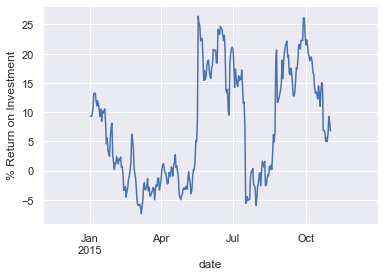

In [79]:
ROI = 100 * (goog.tshift(-60) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

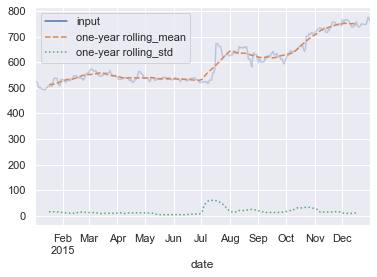

In [80]:
rolling = goog.rolling(30, center=True)                              #rolling stats centred by month
data = pd.DataFrame({'input': goog,
                        'one-year rolling_mean': rolling.mean(), 
                        'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [ ]:
#where learn more?
#https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [3]:
import pandas as pd
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [5]:
data.dropna().describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,62750.000000,62750.000000,62750.000000
mean,114.693163,52.726948,61.966215
std,145.818044,67.595710,90.692425
min,0.000000,0.000000,0.000000
25%,15.000000,7.000000,7.000000
50%,62.000000,29.000000,30.000000
75%,150.000000,71.000000,75.000000
max,1097.000000,698.000000,850.000000


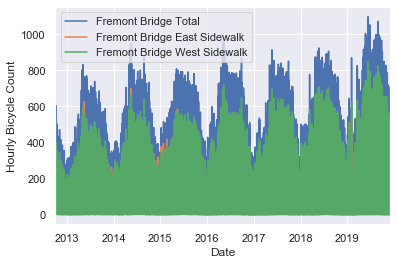

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
data.plot()
plt.ylabel('Hourly Bicycle Count');

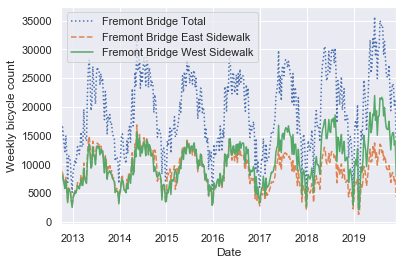

In [8]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

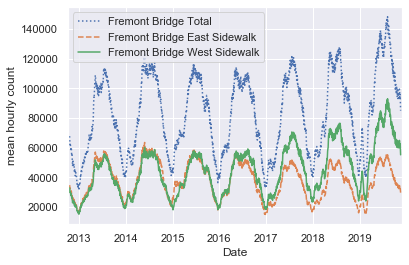

In [9]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-']) #rolling mean
plt.ylabel('mean hourly count');                                      

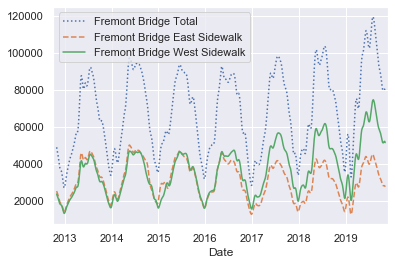

In [11]:
daily.rolling(50, center=True,
            win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']) #smooth by gaussian

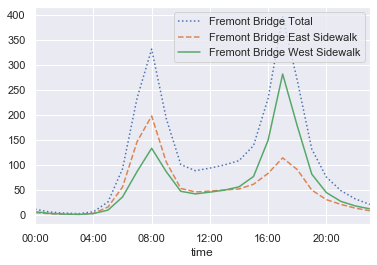

In [13]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

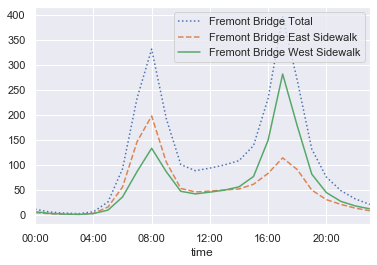

In [19]:
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

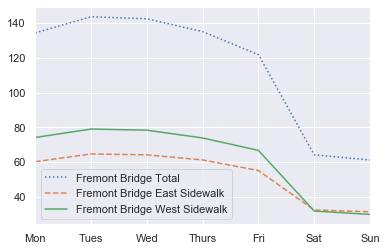

In [21]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

C:\Users\Titan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Titan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


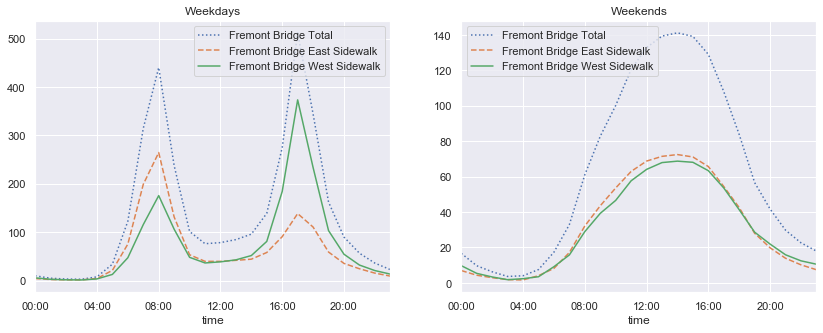

In [23]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
xticks=hourly_ticks, style=[':', '--', '-']);

In [ ]:
#Серия в которой даты являются индексами

In [37]:
stock = pd.read_csv('amzn_stock.csv', index_col = 'Date', parse_dates=True)

In [38]:
stock #теперь данные по дате являются индексами

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
...,...,...,...,...,...
2017-07-11,993.00,995.99,983.72,994.13,2982726
2017-07-12,1000.65,1008.55,998.10,1006.51,3608574
2017-07-13,1004.62,1006.88,995.90,1000.63,2880769


In [39]:
stock.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=1896, freq=None)

In [41]:
stock['2010'] #теперь можно индексироваться по дате

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
...,...,...,...,...,...
2010-12-27,181.90,183.14,180.45,182.14,2249734
2010-12-28,182.10,182.77,181.05,181.09,1975718
2010-12-29,181.80,184.35,180.41,183.37,3122379


In [42]:
stock['2010-02':'2011-03'] #срез по дате

,Open,High,Low,Close,Volume
Date,,,,,
2010-02-01,123.18,124.86,113.82,118.87,37774317
2010-02-02,118.79,118.98,114.40,118.12,23084986
2010-02-03,117.12,119.61,116.56,119.10,12409012
2010-02-04,118.64,120.33,115.74,115.94,12783912
2010-02-05,115.88,117.65,114.10,117.39,11027086
...,...,...,...,...,...
2011-03-25,171.64,173.49,170.30,170.98,4294302
2011-03-28,171.80,172.50,169.25,169.35,3400936
2011-03-29,170.73,174.84,170.07,174.62,4887443


In [47]:
stock.resample('2h').asfreq() #изменяет данные, разбивая на другие периоды
stock.resample('1w').mean() #например среднее значение по неделям

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-10,133.3700,134.564,130.8860,132.872,8900385.80
2010-01-17,129.5660,130.472,126.9940,128.252,10756782.40
2010-01-24,126.5475,128.255,123.7925,125.360,9883903.25
2010-01-31,123.5780,125.528,120.5840,122.796,18627194.20
2010-02-07,118.7220,120.286,114.9240,117.884,19415862.60
...,...,...,...,...,...
2017-06-25,1003.6940,1007.236,993.9580,999.006,3435057.40
2017-07-02,987.3720,994.062,974.0140,981.004,3719885.20
2017-07-09,967.1325,976.000,958.6025,967.240,3116265.75


In [ ]:
#такие операции для которых объект расчета - окно

In [48]:
stock.rolling(3, min_periods=1).mean() #расчет для каждой строки среднего значения из неё + 2 предыдущие строки

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


In [52]:
stock.expanding().mean() #рассчитывает показатель для растягивающегося окна

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


In [53]:
stock.ewm(alpha=0.7).mean() #експоненциально взвешенное окно

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.080769,135.740769,132.116923,134.507692,8.566630e+06
2010-01-06,134.454317,135.013597,131.781007,132.883453,7.569757e+06
2010-01-07,132.729323,133.112682,129.677262,130.848553,1.001179e+07
2010-01-08,131.207098,133.510772,129.223075,132.723121,9.886915e+06
...,...,...,...,...,...
2017-07-11,989.084881,995.142613,982.059585,992.890941,3.089057e+06
2017-07-12,997.180464,1004.527784,993.287876,1002.424282,3.452719e+06
2017-07-13,1002.388139,1006.174335,995.116363,1001.168285,3.052354e+06


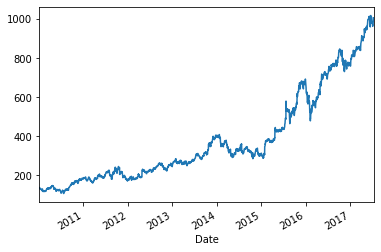

In [54]:
stock['Open'].plot() #можно сгладить этот график

In [55]:
ns = stock['Open'].rolling(10, min_periods=1).mean()

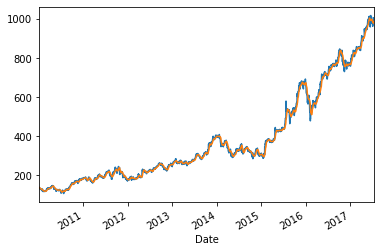

In [57]:
stock['Open'].plot() #можно сгладить этот график
ns.plot() #сглаженный график

In [59]:
stock.index.weekday_name #имена дней в датах

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Monday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='Date', length=1896)

In [61]:
stock.index.weekday_name.value_counts() #считаем количество дней 

Wednesday    390
Tuesday      389
Thursday     382
Friday       380
Monday       355
Name: Date, dtype: int64

In [106]:
stock.expanding().sum()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7.600543e+06
2010-01-05,269.68,272.09,264.95,268.59,1.645700e+07
2010-01-06,404.28,406.82,396.60,400.84,2.363798e+07
2010-01-07,536.29,539.14,525.40,530.84,3.466810e+07
2010-01-08,666.85,672.82,654.43,664.36,4.450193e+07
...,...,...,...,...,...
2017-07-11,712809.96,719868.39,705062.36,712892.68,8.578794e+09
2017-07-12,713810.61,720876.94,706060.46,713899.19,8.582402e+09
2017-07-13,714815.23,721883.82,707056.36,714899.82,8.585283e+09


In [107]:
stock.index.year #Извлечь из дат года

Int64Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=1896)

In [108]:
stock.index.month_name()  #Извлечь из дат названия месяцев

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July',
       'July'],
      dtype='object', name='Date', length=1896)

In [109]:
np.mean(stock.index.dayofyear) #Получить номер среднего дня в году

178.00632911392404

In [110]:
stock.index.day.value_counts()

8     65
9     65
10    65
11    65
12    65
23    65
13    65
7     64
14    64
6     63
17    63
22    63
19    63
15    63
16    62
5     62
21    62
3     62
27    62
28    62
20    61
24    61
2     61
26    60
18    60
4     59
1     58
29    58
25    57
30    56
31    35
Name: Date, dtype: int64

In [ ]:
stock.expanding().sum()

stock.index.year #Извлечь из дат года

stock.index.month_name()  #Извлечь из дат названия месяцев

np.mean(stock.index.dayofyear) #Получить номер среднего дня в году

stock.index.day.value_counts()#full research
#https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/

# 1.16 High-Performance Pandas: eval() and query()

In [29]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(100000)
y = rng.rand(100000)

tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)             #Returns True if two arrays are element-wise equal within a tolerance.

True

In [30]:
import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                        for i in range(4))

In [31]:
%timeit df1 + df2 + df3 + df4

80.7 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
%timeit pd.eval('df1 + df2 + df3 + df4') #much faster

37.6 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                                            for i in range(5))

In [34]:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5') #pd.eval math
np.allclose(result1, result2)

True

In [36]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')              #pd.eval comparison
np.allclose(result1, result2)

True

In [37]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)') #bitwise operators
np.allclose(result1, result2)

True

In [38]:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

In [39]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

In [40]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [41]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)") #
np.allclose(result1, result2)

True

In [43]:
result3 = df.eval('(A + B) / (C - 1)') dataframe.eval
np.allclose(result1, result3)

True

In [47]:
df.eval('D = (A + B) / C', inplace=True) #assign new column
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


In [50]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean') #The @ character here marks a variable name rather than a column name,
np.allclose(result1, result2)

True

In [51]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [52]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

In [53]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean') #The @ character here marks a variable name rather than a column name
np.allclose(result1, result2)

True

In [54]:
#Further Resources
#https://pandas.pydata.org/
#http://shop.oreilly.com/product/0636920023784.do
#https://stackoverflow.com/questions/tagged/pandas
#https://pyvideo.org/tag/pandas/